<div align="right"><img src='images/zestimates.png'/>

<h1 style="color:#009eff;font:luminary;text-align:center;"><i>Where did Zillow go wrong? </i></h1>
    
<h2 style="color:#009eff;text-align:center;"> Predicting errors on Zestimates - December 2, 2022 </h2>


<h1 style="color:#009eff;">Task at hand</h1> 

### Using several data science methods detailed below, our group is estimating the errors zillow's price guesses for houses which sold in 2017.
#### Data Science Methods include:
- splitting model into appropriate groups when recognizing their existence
- regression modeling
- feature engineering using clusters

<h1 style="color:#009eff;">Project Goal</h1> 

### Zillow guessed incorrectly regarding the actual prices which houses sold for throughout the 2017 year. Those guesses are termed "zestimates." By estimating the errors on the model, we can present advice about which model features should be incorporated into or modified in Zillow's price determining model.

<h1 style="color:#009eff;">Plan of action</h1>

### Aqcuire and prepare
1. Acquire'zillow 2017' data from the public facing CodeUp database. Transform the data to a Pandas dataframe for manipulating using Jupyter Notebook.
2. Prepare the data for exploration and analysis. Find out if there are some values missing and find a way to handle those missing values.
3. Change the data types if needed
4. Find if there are features which can be created to simplify the exploration process.
5. Determine which observations are outliers and handle them.
6. Create a data dictionary.
7. Split the data into 3 data sets: train, validate and test data (56%, 24%, and 20% respectively)

### Explore and pre-process
1. Explore the train data set through visualizations and statistical tests. 
2. Determine which variables have statistically significant relationships with zestimates errors. 
2. Make the exploration summary and document the main takeaways.
3. Impute the missing values if needed.
4. Pick the features which can help to build a good prediction model.
5. Identify if new features must be created to improve the model's accuracy.
6. Encode the categorical variables.
7. Split dataframe into segments if those segments represent different populations.
8. Split the target variable from the data sets.
9. Scale the data prior to modeling.

### Explore clusters to add features to model
1. Create clusters using **insert method used here**
2. Determine if any or all clusters crafted add useful information to model.

### Build a regression model
1. Pick the regression algorithms for creating the prediction model.
2. Create the models and evaluate regressors using **Adjusted R-Squared** and **RMSE** scores on the train data set.
3. Pick five of the best performing models based on the Adjusted R-Squared and RMSE score and evaluate them on the validation set.
4. Find out which model has the best performance: relatively high predicting power on the validation set and slight difference in the train and validation prediction results.
5. Make predictions for the test data set.
6. Evaluate the results.

*Draw conclusions*

<h1 style="color:#009eff;">This notebook's required library and module imports</h1>

In [3]:
# standard anaconda libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# setting random seed to 7
np.random.seed(7)

# turning off red warnings
import warnings
warnings.filterwarnings("ignore")

# module for fixing imported modules
from importlib import reload

#custom project modules
import src.wrangle as wr
import src.evaluate as ev

pd.options.display.float_format = '{:,.3f}'.format

## Data Dictionary


| Feature | Definition | Manipulations applied|Data Type|
|--------|-----------|-----------|-----------|
||
|||**Categorical Data**
||
|*county_name*| Identifying Regions: counties and LA city proper  | Used fips and city ID to determine 'LA', 'Orange', 'Ventura' counties and 'LA_city' proper| category
|||**Numerical Data**
||
|*beds*|  Number of bedrooms | Changed the type into integer| integer
|*bath*|  Number of bathrooms | Half-bathrooms were turned into whole number, changed the type intoto integer| integer
|*bed_bath_ratio*|  The ratio of bedrooms to bathrooms | Divided bedroom number by bathroom number | float
|*lot_sqft*| Size of the plot of land the house sits on | Changed the type into integer| integer
|*age*| Age of the house | Created the column by subtracting the year_built from 2017| integer
|*tax_amount*| The home value assessed by the tax collection authority | integer
|*garage_sqft*| Size of the garage with the property | Changed the type into integer| integer
||
|||**Boolean Data**
|*fireplace*| Identifies whether a home has a hottub or a spa | |boolean
|*hottub_spa*| Identifies whether a home has a hottub or a spa | |boolean
|*garage*| Identifies whether a home has a garage | | boolean
|||**Target Data**
||
|**logerror** | **The difference between Zillow's estimated price and actual sale price** | **standardized using logarithmic ratio** | **float**

<h1 style="color:#009eff;">Exploring Data</h1> 

#### We began the project with a theory about which features would have a statistically significant relationship with our target variable 'logerror'. 
#### Recall that logerror is a measure of the difference between zillow's estimate on a house's value and the actual selling price. As a feature was used by zillow successfully, it should have a smaller variance in than a feature which was ignored or not being used by zillow's model well. 
#### Thus, variables which did not have a statistically significant relationship with the logerror were being used by zillow's model well and will not be good for predicting logerror.
#### First step is to divide our data between train, validate and testing samples to preclude us from accidentally spoiling our model's results

In [23]:
df, _, __ = wr.split_zillow(wr.get_zillow())
df['absolute_logerror'] = df['logerror'].abs()

<h2 style="color:#009eff;">Hypothesis Testing Correlation of Features with Predicted Variable, Logerror</h1> 

#### We hypothesize our bank of variables will not have a statistically significant relationship with logerror
#### Using accepted best business practices, we are using a significance level of 95%. That means we expect that there will be less than a 5% chance that our sample is randomly very bad and not representative of the whole population from which it was drawn. 


<h3 style="color:#009eff;">Peek at data</h1>

#### Before we can determine which correlation test to use between Pearson and Spearman, we must see if the feature fits a plot against the target in a roughly linear manner
#### Most of the features do not look clear, but an example of the obviously worst feature and a pretty good feature will be shown below:


<Figure size 2000x2000 with 0 Axes>

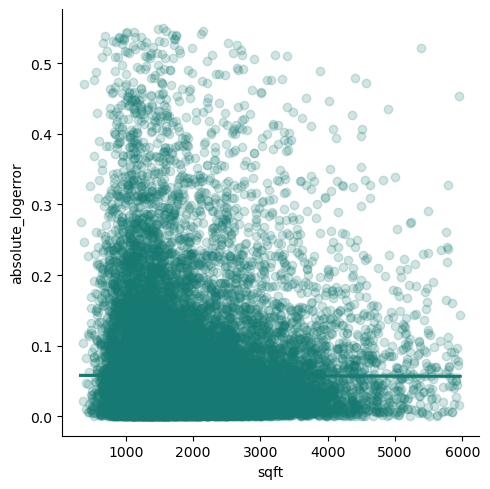

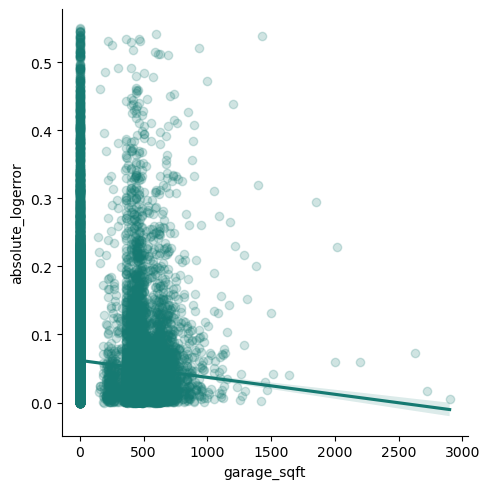

In [24]:
ev.correlation_plot(df)

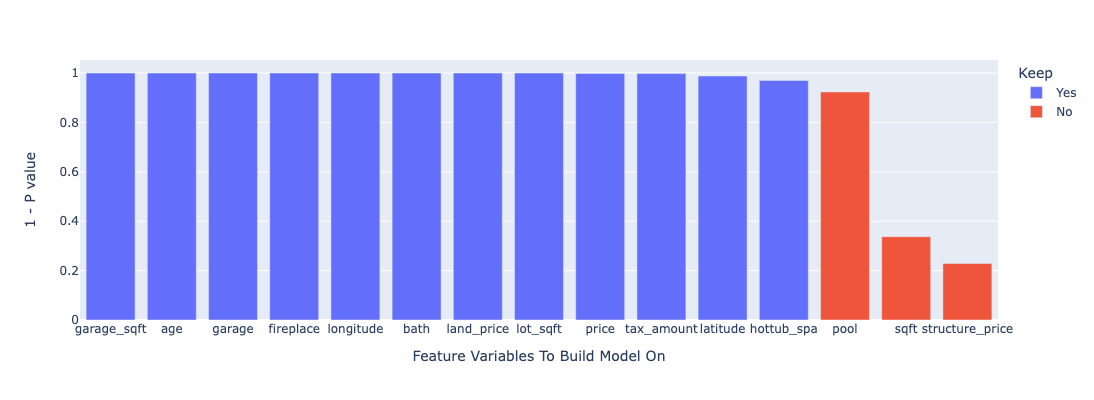

<Figure size 2000x2000 with 0 Axes>

In [19]:
ev.correlation_viz()